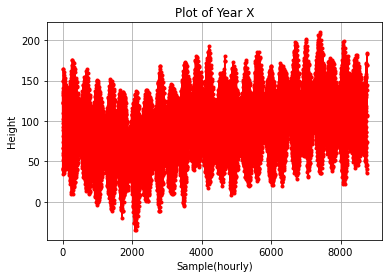

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.fft import fft, rfft, ifft, irfft
from scipy.fft import fftfreq, rfftfreq
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import matplotlib.pyplot as plt

# Read the Excel file
file_path = 'annual_data.xlsx'
df = pd.read_excel(file_path, header=None)  # header=None if your Excel file has no header row

# Concatenate all rows into a single list
data = df.values.flatten().tolist()# Read the Excel file
# Step 3: Plot the array
plt.plot(data, marker='.', linestyle='-', color='red')
plt.title('Plot of Year X')
plt.xlabel('Sample(hourly)')
plt.ylabel('Height')
plt.grid(True)
plt.show()


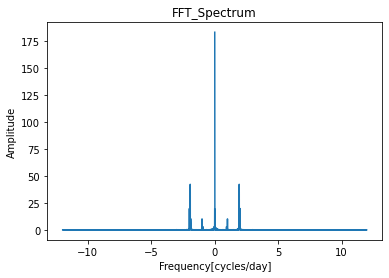

In [5]:
#Get the frequency components of the spectrum
sampling_rate = 24 # It's used as a sample spacing, because 24 hours in a day
frequency_axis = fftfreq(8760, d=1.0/sampling_rate)
norm_amplitude = 2/8760*np.abs(fft(data))

# Plot the results
plt.plot(frequency_axis, norm_amplitude)
plt.xlabel('Frequency[cycles/day]')
plt.ylabel('Amplitude')
plt.title('FFT_Spectrum')
plt.show()

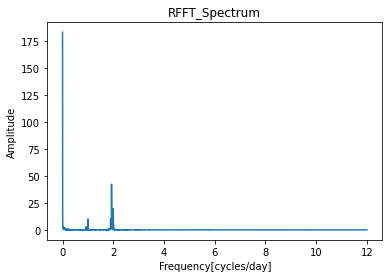

In [6]:
sampling_rate = 24 # It's used as a sample spacing, because 24 hours in a day
rfft_data = rfft(data)
rfft_freq = rfftfreq(8760, d=1.0/sampling_rate)
norm_rfft_amp = 2/8760*np.abs(rfft(data))

# Plot the results
plt.plot(rfft_freq, norm_rfft_amp)
plt.xlabel('Frequency[cycles/day]')
plt.ylabel('Amplitude')
plt.title('RFFT_Spectrum')
plt.show()

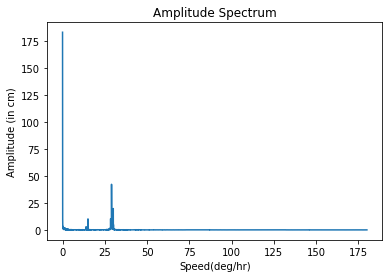

In [7]:
amparray =2/8760*(np.abs(rfft(data)))
plt.plot(15*rfftfreq(8760, d=1/24), 2/8760*(np.abs(rfft(data))))
# amp_dict = {}
# for i in range(0,4380):
#     amp_dict[amparray[i]] = i
# amparray.sort()
# amparray = amparray[::-1]
plt.title('Amplitude Spectrum')
plt.xlabel('Speed(deg/hr)')
plt.ylabel('Amplitude (in cm)')
plt.show()

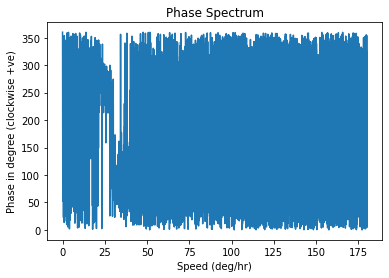

In [8]:
phasearray = np.angle(rfft(data) , deg = True)
phasearray = 360 - phasearray
phasearray[phasearray > 360] -= 360
freqarray = 15*rfftfreq(8760, d=1/24)

plt.plot(15*rfftfreq(8760, d=1/24), phasearray) #plot the y and sort in reverse order

plt.title('Phase Spectrum')
plt.xlabel('Speed (deg/hr)')
plt.ylabel('Phase in degree (clockwise +ve)')
plt.show()

In [9]:
const_rfft_data = np.zeros(np.shape(rfft_data), dtype='complex128') #constructed rfft data array
top_amp = []
top_speed = []
top_phase = []
tmp = np.argpartition(-amparray, 11)
top_indices = tmp[:11]
for i in top_indices:
    top_amp.append(amparray[i])
    top_speed.append(15*rfft_freq[i])
    top_phase.append(phasearray[i])
    const_rfft_data[i] = rfft_data[i]

df = pd.DataFrame({'Amplitude':top_amp, 'Speed (degs/hour)': top_speed, 'Phase (clockwise +ve)': top_phase})
output_file = 'amp_phase.xlsx'
df.to_excel(output_file)

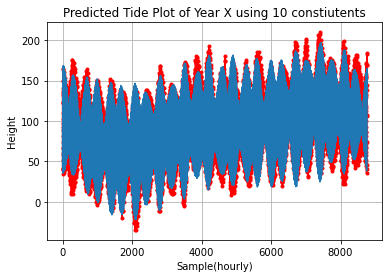

In [10]:
pred_tide = irfft(const_rfft_data, 8760)
plt.plot(data, marker='.', linestyle='-', color='red')
plt.plot(pred_tide)
plt.title('Predicted Tide Plot of Year X using 10 constiutents')
plt.xlabel('Sample(hourly)')
plt.ylabel('Height')
plt.grid(True)
plt.show()

In [11]:

# fig1 = px.line(
#     x=np.arange(len(pred_tide)),  # Create x-axis from index
#     y=data,
#     title="Actual data plot of Year X",
#     labels={"x": "Sample(hourly)", "y": "Height"},
# )

# fig2 = px.line(
#     x=np.arange(len(pred_tide)),  # Create x-axis from index
#     y=pred_tide,
#     title="Predicted Tide Plot of Year using 100 constiutents",
#     labels={"x": "Sample(hourly)", "y": "Height"},
# )

# figs = [fig1,fig2]

# for fig in figs:
#     fig.show()

In [32]:
# https://dsp.stackexchange.com/a/510/25943
# https://dsp.stackexchange.com/questions/44800/how-to-do-simple-extrapolation-with-fourier-transformation

data = irfft(const_rfft_data)
dft_data = fft(data)
const_tide_data = np.zeros(2*np.shape(dft_data)[0], dtype='complex128')
N = len(dft_data)
M = 2*len(dft_data) #One year prediction
for k in range(0, M):
    for n in range(0, N):
        const_tide_data[k] += dft_data[n]*(np.exp(1j * 2*np.pi * n * k / N))*(1/N)
   

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


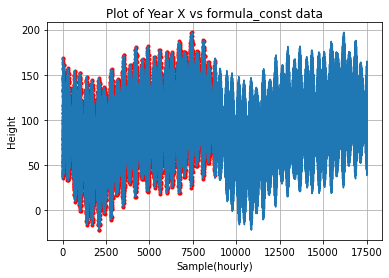

In [37]:
plt.plot(data, marker='.', linestyle='-', color='red')
plt.title('Plot of Year X vs formula_const_data(predicted)')
plt.xlabel('Sample(hourly)')
plt.ylabel('Height')
plt.grid(True)
plt.plot(const_tide_data)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


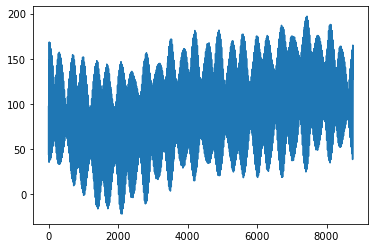

In [52]:
plt.plot(ifft(fft(irfft(const_rfft_data))))